# Unit 4.3: Line Spectra and their Applications

## Colophon

An annotatable worksheet for this presentation is available as [**Worksheet 11**](https://cpjobling.github.io/eg-247-textbook/fourier_series/3/worksheet11.html).

* The source code for this page is [fourier_series/3/exp_fs2.ipynb](https://github.com/cpjobling/eg-247-textbook/blob/master/fourier_series/3/exp_fs2.ipynb).

* You can view the notes for this presentation as a webpage ([HTML](https://cpjobling.github.io/eg-247-textbook/fourier_series/3/exp_fs2.html)). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/fourier_series/3/exp_fs2.pdf) file.

This section concludes our introduction to Fourier Series.

In the [last section](../2/exp_fs1) we saw that we could exploit the complex exponential $e^{j\omega t}$ to redefine trigonometric Fourier Series into the Exponential Fourier Series and in so doing we eliminate one integration and at the same time simplify the calculation of the coefficients of the Fourier series.

In this section we show how the Exponential form of the Fourier Series leads us to the ability to present waveforms as line spectra which simplifies the calculation of power for systems with harmonics and leads in the limit as 𝑇 approaches infinity to the Fourier Transform.

## Agenda

* Line spectra
* Power in periodic signals
* Steady-state response of an LTI system to a periodic signal

## Harmonic frequencies

In response to a Student query, I have given a little more information on [Harmonic Frequencies](/FAQS/faq.html#Harmonic-frequencies) in the FAQs.

## Line Spectra

The use of line spectra diagrams is a useful way to visualize the harmonic frequency components of a peiodic signal. 

In MATLAB, the easiest way to plot this is using a *stem plot* of the lines, representing the FS coefficients, plotted against $k$.

### Line Spectra for Exp. FS

When the Exponential Fourier series are known it is useful to plot the amplitude and phase of the harmonics on a frequency scale.

This is the spectrum of the Exponential Fourier Series calculated last time

<img src="pictures/efs_sqw.png">

### Line Spectra for Trig. FS

If we take the results for the Exponential Fourier Series and gather terms, the amplitudes for the Trig. Fourier Series are given by:

$$a_0 = 2C_0$$

$$a_k = (C_k + C_{-k})$$

$$b_k = j(C_k - C_{-k})$$

Applying this to the previous result we get

<img src="pictures/line-spec.png">

### Example 3

Compute the exponential Fourier series for the waveform shown below and plot its line spectra.

<img src="pictures/pulse_train.png">

### Solution

The recurrent rectangular pulse is used extensively in digital communication systems. To determine how faithfully such pulses will be transmitted, it is necessary to know the frequency components.

**What do we know?**

* The pulse duration is $T/w$.
* The recurrence interval $T$ is $w$ times the pulse duration.
* $w$ is the ratio of pulse repetition time to the pulse duration &ndash; normally called the *duty cycle*.

#### Coefficients of the Exponential Fourier Series?

Given

$$C_k = \frac{1}{2\pi}\int_{-\pi}^{\pi} f(\Omega_0 t)e^{-jk(\Omega_0 t)}\,d(\Omega_0 t)$$

* Is the function **even** or **odd**?
* Does the signal have **half-wave symmetry**?
* What are the cosequencies of symmetry on the form of the coefficients $C_k$?
* What function do we actually need to integrate to compute $C_k$?

Practice here. Solutions at bottom of section.

<pre style="border: 2px solid blue">















</pre>

#### DC Component?

Let $k = 0$ then perform the integral

<pre style="border: 2px solid blue">















</pre>

#### Harmonic coefficients?

Integrate for $k\ne 0$

<pre style="border: 2px solid blue">















</pre>

#### Exponential Fourier Series?

<pre style="border: 2px solid blue">















</pre>

### Effect of pulse width on frequency spectra

let's see what effect the duty cycle $w$ has on the spectra.

Recall pulse width = $T/w$ and plot the complex line spectra for pulse with width $w$ which repeats every $T$ seconds. We will write a MATLAB function `pulse_fs` to simplify the computation.

In [1]:
clear all
cd ../matlab
format compact

In [2]:
%%file ../matlab/pulse_fs.m
function [f,omega] = pulse_fs(A,w,range)
% PULSE_FS compute fourier series spectrum in range
% -range:range for pulse with 
% height A, period T and width duty cycle w.
omega = -range:range;
for mm = 1:length(omega)
    x = omega(mm)*pi/w;
    if omega(mm) == 0
        f(mm) = A/w;
    else
        f(mm) = (A/w)*sin(x)/(x);
    end
end
return

Created file '/Users/eechris/code/src/github.com/cpjobling/eg-247-textbook/fourier_series/matlab/pulse_fs.m'.


#### w = 2

$\Omega_0 = 1$ rad/s; $w = 2$; $T = 2\pi$ s; $T/w = \pi$ s.

Compute Fourier Series

In [3]:
A = 1; w = 2;
[f,omega] = pulse_fs(A,w,15);

Plot line Spectrum and add add continuous $\mathrm{sinc}(x)$ envelope.

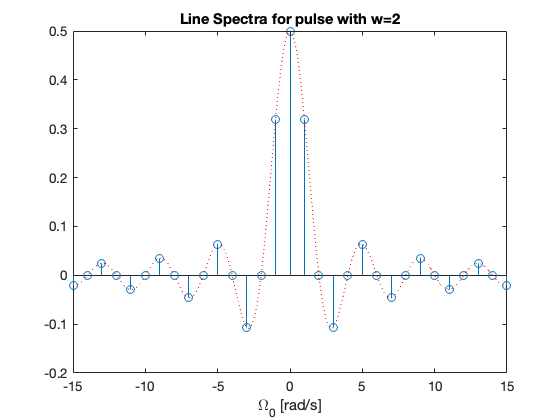

In [4]:
stem(omega,f)
title('Line Spectra for pulse with w=2')
hold on
om = linspace(-15,15,1000);
xlabel('\Omega_0 [rad/s]')
xc = om.*pi./w;

plot(om,(A/w)*sin(xc)./(xc),'r:')
hold off

#### w = 5

$\Omega_0 = 1$ rad/s; $w = 5$; $T = 2\pi$ s; $T/w = \pi$ s.

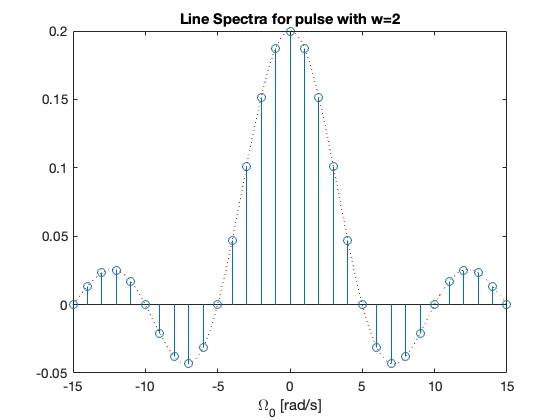

In [5]:
A = 1; w = 5; [f,omega] = pulse_fs(A,w,15);
stem(omega,f)
title('Line Spectra for pulse with w=2')
hold on
om = linspace(-15,15,1000);
xlabel('\Omega_0 [rad/s]')
xc = om.*pi./w;
plot(om,(A/w)*sin(xc)./(xc),'r:')
hold off

#### w = 10

$\Omega_0 = 1$ rad/s; $w = 10$; $T = 2\pi$ s; $T/w = \pi$ s.

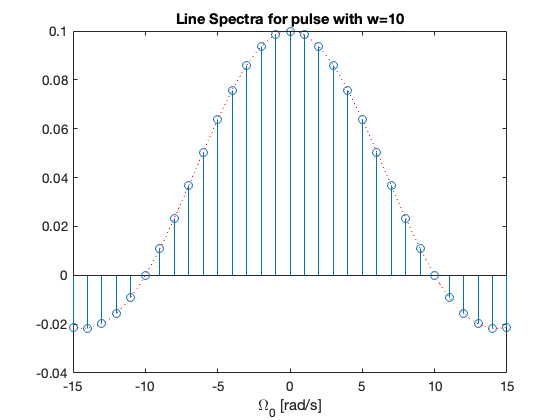

In [6]:
A = 1; w = 10; [f,omega] = pulse_fs(A,w,15);
stem(omega,f)
title('Line Spectra for pulse with w=10')
hold on
om = linspace(-15,15,1000);
xlabel('\Omega_0 [rad/s]')
xc = om.*pi./w;
plot(om,(A/w)*sin(xc)./(xc),'r:')
hold off

#### Implications

* As the width of the pulse **reduces** the width of the freqency spectra needed to fully describe the signal **increases** 
* more bandwidth is needed to transmit the pulse.

**Note**

Text book seems to get the wrong results. Karris plots $\sin(wx)/(wx)$ rather than $\sin(x/w)/(x/w)$ in producing the diagrams shown in Figs. 7.36&mdash;7-38.

However, if you view $\sin(wx)/wx$ as in indication of the bandwidth needed to transmit a pulse of width $T/w$ the plots Karris gives make more sense.

### Example 4

Use the result of Example 1 to compute the exponential Fourier series of the impulse train $\delta(t\pm 2\pi k)$ shown below 

<img src="pictures/impulse_train.png">

### Solution

To solve this we take the previous result and choose amplitude (height) $A$ so that area of pulse is unity. Then we let width go to zero while maintaining the area of unity. This creates a train of impulses $\delta(t\pm 2\pi k)$.

$$C_k  = \frac{1}{2\pi}$$

and, therefore

$$f(t) = \frac{1}{2\pi}\sum_{k=-\infty}^{\infty} e^{jk\Omega_0 t}$$

Try it!

#### Proof!

From the previous result, 

$$C_n = \frac{A}{w}.\frac{\sin(k\pi/w)}{k\pi/w}$$

and the pulse width was defined as $T/w$, that is

$$\frac{T}{w}=\frac{2\pi}{w}$$

Let us take the previous impulse train as a recurrent pulse with amplitude

$$A = \frac{1}{T/w} = \frac{1}{2\pi/w} = \frac{w}{2\pi}.$$

#### Pulse with unit area

The area of each pulse is then 

$$\frac{2\pi}{w}\times\frac{w}{2\pi} = 1$$

and the pulse train is as shown below:

<img src="pictures/unit_area_pulses.png">

#### New coefficents

The coefficients of the Exponential Fourier Series are now:
    
$$C_k = \frac{w/2\pi}{w}\frac{\sin(k\pi/w)}{k\pi/w} = \frac{1}{2\pi}\frac{\sin(k\pi/w)}{k\pi/w}$$

and as $\pi/w \to 0$ each recurrent pulse becomes a unit impulse, and the pulse train reduces to a unit impulse train.

Also, recalling that

$$\lim_{x\to 0} \frac{\sin \pi x}{\pi x} = 1$$

the coefficents reduce to

$$C_k = \frac{1}{2\pi}$$

That is all coefficients have the same amplitude and thus

$$f(t) = \frac{1}{2\pi}\sum_{n=-\infty}^{\infty} e^{jk\Omega_0 t}$$

#### Spectrum of Unit Impulse Train

The line spectrum of a sequence of unit impulses $\delta(t \pm kT)$ is shown below:
                                                         
<img src="pictures/impulse_spectrum.png">

#### Another Interesting Result

Consider the pulse train agin:

<img src="pictures/pulse_train.png">

What happens when the pulses to the left and right of the centre pulse become less and less frequent? That is what happens when $T \to \infty$?

#### Well?

* As $T\to \infty$ the fundamental frequency $\Omega_0 \to 0$
* We are then left with just one pulse centred around $t=0$.
* The frequency difference between harmonics also becomes smaller.
* Line spectrum becomes a continous function.

This result is the basis of the *Fourier Transform* which is coming next.

## Power in Periodic Signals

In your previous courses you may have come across the definitions of Signal Energy, Average Signal Power and Root Mean Square Power:

$$E = \int_0^T |f(t)|^2 dt$$

$$P_{\mathrm{av}} = \frac{1}{T}\int_0^T |f(t)|^2 dt$$

$$P_{\mathrm{RMS}} = \sqrt{\frac{1}{T}\int_0^T |f(t)|^2 dt}$$

### Parseval's Theorem

[Parseval's Theorem](https://en.wikipedia.org/wiki/Parseval's_theorem) states that the total average power of a periodic signal $f(t)$ is equal to the sum of the average powers of all its harmonic components.

The power in the $k$th harmonic $C_ke^{jk\Omega_0 t}$ is given by

$$P_k = \frac{1}{T}\int_0^T\left|C_ke^{jk\Omega_0 t}\right|^2\,dt = \frac{1}{T}\int_0^T\left|C_k\right|^2\,dt=\left|C_k\right|^2$$

Since $P_k = P_{-k}$, the total power of the $k$th harmomic is $2P_k$.

You should note that $|C_k| = \sqrt{C_k C_k^*}$ so $|C_k|^2 = C_k C_k^*$.

Parseval's theorem states that

$$P = \frac{1}{T}\int_0^T \left|f(t)\right|^2\,dt = \sum_{k=-\infty}^{\infty}\left|C_k\right|^2.$$

### RMS Power

By a similar argument:

$$P_{\mathrm{RMS}} = \sqrt{\frac{1}{T}\int_0^T \left|f(t)\right|^2\,dt} = \sqrt{\sum_{k=-\infty}^{\infty}\left|C_k\right|^2}.$$

### Example 5

Compute the average power of a pulse train for which the pulse width is $T/2$ (duty cycle 50%). Use the previous result: 

$$C_n = \frac{A}{w}.\frac{\sin(k\pi/w)}{k\pi/w}$$

as your starting point.

<pre style="border: 2px solid blue">















</pre>

### Power Spectrum

The *power spectrum* of signal is the sequence of average powers in each complex harmonic: 

$$|C_k|^2.$$ 

For real periodic signals the power spectrum is a real even sequence as 

$$|C_{-k}|^2 = |C_k^*|^2 = |C_k|^2.$$

In [7]:
A = 1; w = 8; [f,omega] = pulse_fs(A,w,15);

Power spectrum

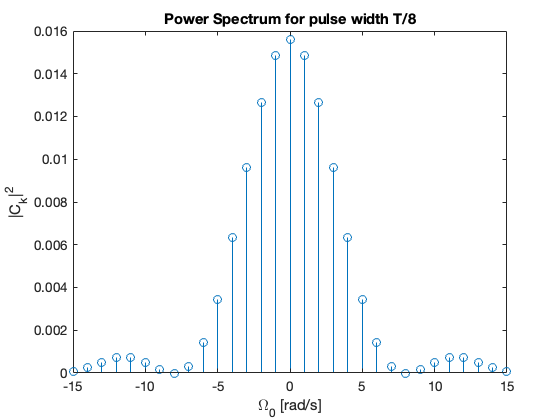

In [8]:
stem(omega,abs(f).^2)
title('Power Spectrum for pulse width T/8')
ylabel('|C_k|^2')
xlabel('\Omega_0 [rad/s]')

Note that most of the power is concentrated at DC and in the first seven harmonic components. That is in the frequency range $[-14\pi/T,+14\pi/T]$ rad/s.

### Total Harmonic Distortion

Suppose that a signal that is supposed to be a pure sine wave of amplitude A is distorted as shown below

<img src="pictures/thd.png">

This can occur in the line voltages of an industrial plant that makes heavy use of nonlineear loads such as electric arc furnaces, solid state relays, motor drives, etc (E.g. Tata Steel!)

#### THD Defined

Clearly, some of the harmonics for $k\ne \pm 1$ are nonzero. One way to characterize the distortion is to compute the ratio of average power in all the harmonics that "should not be present", that is for $k > 1$, to the total average power of the distorted sine wave. The square-root of this ratio is called the *total harmonic distortion* (THD) of the signal.

If the signal is real and based on a sine wave (that is *odd*), then $C_k=0$ and

$$f_{\mathrm{RMS}}=\sqrt{\sum_{k=1}^{\infty}2|C_k|^2}$$

and we can define the THD as the ratio of the RMS value for all the harmonics for $K>1$ (the distortion) to the RMS of the fundamental which is $$\sqrt{2\left|C_1\right|^2}:$$

$${\rm{THD}} = 100\sqrt {\frac{\sum\limits_{k = 2}^\infty  {\left| C_k \right|^2}} {\left| C_1 \right|^2}} \% $$

#### Computation of THD

<img src="pictures/thd_ps.png">

## Steady-State Response of an LTI System to a Periodic Signal

The response of an LTI system with impulse response $h(t)$ to a complex exponential signal $e^{st}$ is the same complex exponential multiplied by a complex gain: $y(t) = H(s)e^{st}$, where:

$$H(s)=\int_{-\infty}^{\infty}h(\tau)e^{-s\tau}\,d\tau.$$

In particular, for $s = j\omega$, the output is simply $y(t)=H(j\omega)e^{j\omega t}$.

The complex functions $H(s)$ and $H(j\omega)$ are called the system's *transfer function* and *frequency response*, respectively.

### By superposition

The output of an LTI system to a periodic function with period $T$ represented by a Fourier series is given by:

$$y(t)=\sum_{k=-\infty}^{\infty} C_kH(jk\Omega_0)e^{jk\Omega_0 t}$$

where $\Omega_0 = T/2\pi$ is the fundamental frequency.

Thus $y(t)$ is a Fourier series itself with coefficients $D_k$:

$$D_k = C_kH(jk\Omega_0)$$

### Implications of this important result

The effect of an LTI system on a periodic input signal is to modify its Fourier series through a multiplication by its frequency response evaluated at the harmonic frequencies.

### Illustration

This picture below shows the effect of an LTI system on a periodic input in the frequency domain.

<img src="pictures/filter.png">

### Further explanation

I have added some additional notes on [Filter Attenuation](/FAQS/faq.html#Filter-attenuation) in the [FAQs](/FAQS/faq).

### Filtering

A consequence of the previous result is that we can design a system that has a desirable frequency spectrum $H(jk\Omega_0)$ that retains certain frequencies and cuts off others.

We will return to this idea later.

## Summary

*Summary*

* Line spectra
* Power in periodic signals
* Steady-state response of an LTI system to a periodic signal

### Answers

Given

$$C_k = \frac{1}{2\pi}\int_{-\pi}^{\pi} f(t)e^{-jk(\Omega_0 t)}\,d(\Omega_0 t)$$

* Is the function **even** or **odd**? **even** $f(t) = f(-t)$!
* Does the signal have **half-wave symmetry**? No!
* What are the cosequencies of symmetry on the form of the coefficients $C_k$? $C_k$ will be real values. Trig. equivalent no sine terms.
* What function do we actually need to integrate to compute $C_k$? We only need to integrate between the limits $-\pi/w \to \pi/w$

$$C_k = \frac{1}{2\pi}\int_{-\pi/w}^{\pi/w} Ae^{-jk(\Omega_0 t)}\,d(\Omega_0 t) = \frac{A}{2\pi}\int_{-\pi/w}^{\pi/w} e^{-jk(\Omega_0 t)}\,d(\Omega_0 t) $$

### Solution: DC component!

$$C_0 = \left.\frac{A}{2\pi}\,\Omega_0 t\,\right|_{-\pi/w}^{\pi/w} = \frac{A}{2\pi}\left(\frac{\pi}{w}+\frac{\pi}{w}\right)$$

or

$$C_0 = \frac{A}{w}$$

### Harmonic coefficients!

$$C_k = \left.\frac{A}{-jk2\pi}\,e^{-jk(\omega t)}\,\right|_{-\pi/w}^{\pi/w} = \frac{A}{k\pi}\left(\frac{e^{jk\pi/w}-e^{-jk\pi/w}}{j2}\right) = \frac{A}{k\pi}\sin\left(\frac{k\pi}{w}\right)$$

$$C_k = \frac{A}{w}\frac{sin\left(k\pi/w\right)}{k\pi/w}$$

### Exponential Fourier Series!

$$f(t)=\sum_{k=-\infty}^{\infty}\;\frac{A}{w}\,\frac{\sin\left(k\pi/w\right)}{k\pi/w} e^{-k\Omega_0 t}$$

### Solution 5

$w = 2$ so:

$$C_n = \frac{A}{2}.\frac{\sin(k\pi/2)}{k\pi/2}$$

Write down an expression for $P$ using Parseval's Theorem

### P

$$P = \sum\limits_{k =  - \infty }^\infty  \left| C_k \right|^2  = \sum\limits_{k =  - \infty }^\infty  \left| \frac{A}{2}{\mathop{\rm sinc}\nolimits} \frac{k\pi }{2} \right|^2  = {A^2}\left( \frac{1}{4} + 2\sum\limits_{k = 1}^\infty  \left| \frac{1}{4}\mathop{\rm sinc}\nolimits \frac{k\pi }{2} \right|^2  \right)$$

sinc$(k\pi/2) = 0$ for $k$ even ($k=0,2,4,6,\ldots$) so...?

### P for k odd

$$P = A^2\left( \frac{1}{4} + \frac{1}{2}\sum\limits_{k = 1,3,5, \ldots }^\infty  \left| \rm{sinc}\frac{k\pi }{2} \right| ^2 \right) = A^2\left( \frac{1}{4} + \frac{1}{2}\sum\limits_{k = 1,3,5, \ldots }^\infty  \left| \frac{\sin \left( \frac{k\pi }{2} \right)}{\frac{k\pi }{2}} \right|^2  \right)$$

$\sin(k\pi/2) = 1$ for $k$ odd ($k=1,3,5,7,\ldots$) so...?

### P after eliminating sine

$$P = {A^2}\left( \frac{1}{4} + \frac{2}{\pi ^2}\left[ 1 + \frac{1}{9} + \frac{1}{25} +  \ldots  \right]  \right) = {A^2}\left( \frac{1}{4} + \frac{2}{\pi ^2}\left[ \frac{\pi ^2}{8} \right] \right)$$

$$P = \frac{A^2}{2}$$

### Check P from f(t)

$$P = \frac{1}{2\pi}\int_{-\pi/2}^{\pi/2}|f(t)|^2\,d\omega t = \frac{1}{2\pi}\int_{-\pi/2}^{\pi/2}|A|^2\,d\omega t = \frac{A^2}{2\pi}\left(\frac{\pi}{2}+\frac{\pi}{2}\right) = \frac{A^2}{2}.$$